<a href="https://colab.research.google.com/github/costprot/ml_methods_and_algorythms/blob/main/ml_methods_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1.1/ Meteorological Predictions**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving athens_09-16.csv to athens_09-16.csv


In [ ]:
# import data to csv and then import csv to data frame with pandas
import io
import pandas as pd
df16 = pd.read_csv(io.BytesIO(uploaded['athens_09-16.csv']))
df16

,Month,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,1.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1,10.0,25.3,16.6,0.3,2.7,0.0,1.4,16.1
2,12.0,15.8,4.2,8.3,0.0,3.4,1.6,24.1
3,12.0,11.2,5.8,9.0,0.0,0.0,7.7,38.6
4,5.0,23.6,18.2,0.0,1.7,0.0,8.4,37.0
...,...,...,...,...,...,...,...,...
2437,6.0,29.5,23.8,0.0,7.8,0.0,3.9,30.6
2438,2.0,17.7,13.4,2.7,0.0,0.4,1.9,27.4
2439,12.0,18.4,13.7,2.4,0.0,0.0,1.3,19.3
2440,6.0,35.2,25.8,0.0,12.8,0.0,8.2,37.0


Some familiarity with the data

In [ ]:
df16.sort_values(by='Month')

,Month,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,1.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
748,1.0,7.3,4.4,12.6,0.0,0.0,4.5,22.5
747,1.0,15.5,5.5,7.7,0.0,0.0,1.3,16.1
726,1.0,18.6,15.9,1.2,0.0,0.0,8.7,37.0
2086,1.0,13.5,8.8,6.4,0.0,3.0,1.9,22.5
...,...,...,...,...,...,...,...,...
374,12.0,8.3,5.2,11.8,0.0,0.0,14.5,56.3
757,12.0,17.3,11.2,3.9,0.0,1.2,6.0,46.7
761,12.0,14.9,12.2,5.2,0.0,0.2,7.7,29.0
2231,12.0,13.8,6.6,7.7,0.0,0.0,3.9,38.6


In [ ]:
df16.isnull().sum() # no missing values

Month             0
Max_temp          0
Min_temp          0
Heat_deg_days     0
Cool_deg_days     0
Height_rain       0
Avg_wind_speed    0
Max_wind_speed    0
dtype: int64

In [ ]:
df16.info() # only numeric values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           2442 non-null   float64
 1   Max_temp        2442 non-null   float64
 2   Min_temp        2442 non-null   float64
 3   Heat_deg_days   2442 non-null   float64
 4   Cool_deg_days   2442 non-null   float64
 5   Height_rain     2442 non-null   float64
 6   Avg_wind_speed  2442 non-null   float64
 7   Max_wind_speed  2442 non-null   float64
dtypes: float64(8)
memory usage: 152.8 KB


In [ ]:
df16.describe().transpose() # Desciptive Statistics

,count,mean,std,min,25%,50%,75%,max
Month,2442.0,6.594595,3.428837,1.0,4.0,7.0,10.000,12.0
Max_temp,2442.0,23.439476,7.660457,5.0,17.4,23.0,30.200,39.8
Min_temp,2442.0,15.893857,6.809994,0.4,10.3,15.4,22.000,30.3
Heat_deg_days,2442.0,2.580262,3.402915,0.0,0.0,0.7,4.600,15.3
Cool_deg_days,2442.0,3.809541,4.472352,0.0,0.0,1.4,7.775,16.4
Height_rain,2442.0,1.317035,5.194972,0.0,0.0,0.0,0.000,97.0
Avg_wind_speed,2442.0,4.694513,3.230696,0.3,2.4,3.7,6.300,17.7
Max_wind_speed,2442.0,29.304709,9.809560,8.0,22.5,29.0,35.400,70.8


Text(0.5, 0, 'Months')

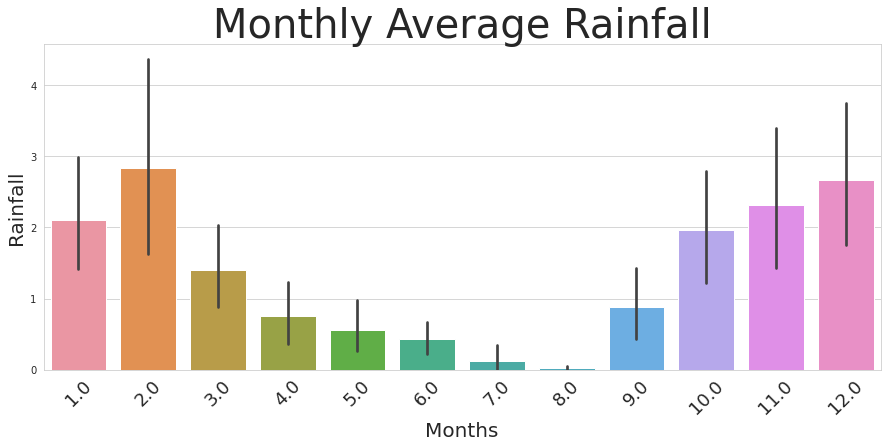

In [ ]:
import matplotlib.pyplot as plt # some visuals
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
plt.subplots(figsize=(15,6))
plt.title("Monthly Average Rainfall", fontsize=40)
sns.barplot(x ="Month", y ="Height_rain", data=df16)
plt.xticks(rotation = 45)
plt.xticks(fontsize=18)
plt.ylabel("Rainfall",fontsize=20)
plt.xlabel("Months",fontsize=20)

In [ ]:
df16.corr()["Height_rain"].sort_values() # An early look in the correlation

Max_temp         -0.183071
Cool_deg_days    -0.169533
Min_temp         -0.128665
Avg_wind_speed    0.003382
Month             0.015834
Heat_deg_days     0.113008
Max_wind_speed    0.132483
Height_rain       1.000000
Name: Height_rain, dtype: float64

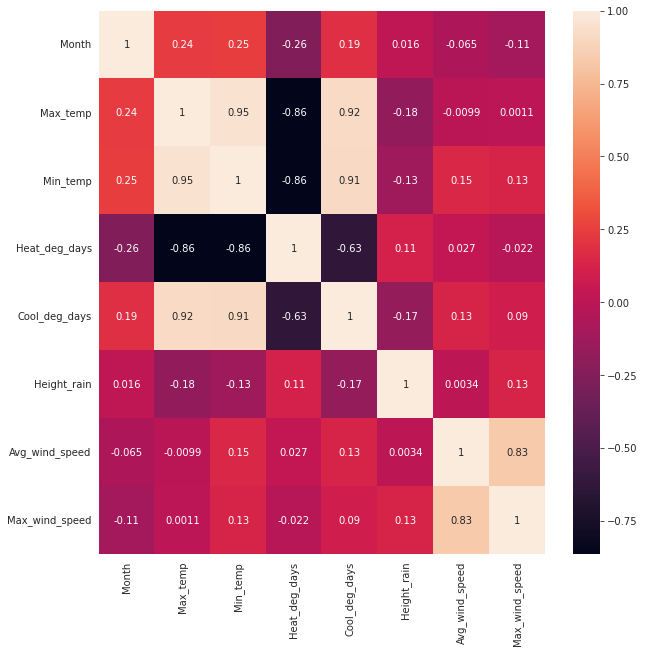

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df16.corr(),annot=True)
plt.show()

In [ ]:
# we have a strong hint that regression models won't be a good fit because of strong Multicollinearity

In [ ]:
# alteration for question 1.b

df16.loc[df16['Month'] == 12, 'Month'] = 0     # winter
df16.loc[df16['Month'] == 1, 'Month'] = 0
df16.loc[df16['Month'] == 2, 'Month'] = 0
df16.loc[df16['Month'] == 3, 'Month'] = 1      # spring
df16.loc[df16['Month'] == 4, 'Month'] = 1
df16.loc[df16['Month'] == 5, 'Month'] = 1
df16.loc[df16['Month'] == 6, 'Month'] = 2      # summer
df16.loc[df16['Month'] == 7, 'Month'] = 2
df16.loc[df16['Month'] == 8, 'Month'] = 2
df16.loc[df16['Month'] == 9, 'Month'] = 3      # fall
df16.loc[df16['Month'] == 10, 'Month'] = 3
df16.loc[df16['Month'] == 11, 'Month'] = 3
df16.rename(columns = {'Month': 'Season'}, inplace = True)

df16

,Season,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,0.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1,3.0,25.3,16.6,0.3,2.7,0.0,1.4,16.1
2,0.0,15.8,4.2,8.3,0.0,3.4,1.6,24.1
3,0.0,11.2,5.8,9.0,0.0,0.0,7.7,38.6
4,1.0,23.6,18.2,0.0,1.7,0.0,8.4,37.0
...,...,...,...,...,...,...,...,...
2437,2.0,29.5,23.8,0.0,7.8,0.0,3.9,30.6
2438,0.0,17.7,13.4,2.7,0.0,0.4,1.9,27.4
2439,0.0,18.4,13.7,2.4,0.0,0.0,1.3,19.3
2440,2.0,35.2,25.8,0.0,12.8,0.0,8.2,37.0


In [ ]:
df16.sort_values(by='Season')

,Season,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,0.0,16.5,11.3,4.4,0.0,0.0,2.4,32.2
1105,0.0,15.6,9.7,4.7,0.0,41.6,9.3,61.2
1108,0.0,14.6,8.1,6.9,0.0,0.0,1.0,17.7
1115,0.0,18.9,12.1,2.6,0.0,0.0,7.4,51.5
1117,0.0,14.3,9.1,6.6,0.0,0.0,4.5,32.2
...,...,...,...,...,...,...,...,...
228,3.0,24.6,13.0,1.7,1.6,0.0,0.5,11.3
1487,3.0,31.4,23.2,0.0,8.7,0.0,8.0,35.4
1490,3.0,19.6,14.3,2.1,0.1,60.6,2.1,27.4
1503,3.0,21.0,16.8,0.2,0.7,1.6,2.3,22.5


**Check of the second dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving athens_2017.csv to athens_2017.csv


In [ ]:
df17 = pd.read_csv(io.BytesIO(uploaded['athens_2017.csv']))
df17

,Month,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,1.0,10.0,4.0,11.6,0.0,0.0,1.8,16.1
1,1.0,12.8,1.9,10.9,0.0,0.0,0.6,14.5
2,1.0,15.3,4.6,8.7,0.0,0.0,1.1,24.1
3,1.0,15.5,5.7,7.3,0.0,0.2,1.8,24.1
4,1.0,17.1,7.7,5.3,0.0,0.0,4.2,43.5
...,...,...,...,...,...,...,...,...
360,12.0,16.7,7.4,6.1,0.0,0.2,1.1,17.7
361,12.0,16.2,10.8,4.1,0.0,3.0,6.9,45.1
362,12.0,16.7,10.3,5.1,0.0,7.4,2.3,29.0
363,12.0,15.2,8.4,6.2,0.0,0.0,1.8,29.0


In [ ]:
df17.isnull().sum() # no missing values

Month             0
Max_temp          0
Min_temp          0
Heat_deg_days     0
Cool_deg_days     0
Height_rain       0
Avg_wind_speed    0
Max_wind_speed    0
dtype: int64

In [ ]:
df17.info() # only numeric values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           365 non-null    float64
 1   Max_temp        365 non-null    float64
 2   Min_temp        365 non-null    float64
 3   Heat_deg_days   365 non-null    float64
 4   Cool_deg_days   365 non-null    float64
 5   Height_rain     365 non-null    float64
 6   Avg_wind_speed  365 non-null    float64
 7   Max_wind_speed  365 non-null    float64
dtypes: float64(8)
memory usage: 22.9 KB


Alteration of the second dataset for question 1.b

In [ ]:
df17.loc[df17['Month'] == 12, 'Month'] = 0     # winter
df17.loc[df17['Month'] == 1, 'Month'] = 0
df17.loc[df17['Month'] == 2, 'Month'] = 0
df17.loc[df17['Month'] == 3, 'Month'] = 1      # spring
df17.loc[df17['Month'] == 4, 'Month'] = 1
df17.loc[df17['Month'] == 5, 'Month'] = 1
df17.loc[df17['Month'] == 6, 'Month'] = 2      # summer
df17.loc[df17['Month'] == 7, 'Month'] = 2
df17.loc[df17['Month'] == 8, 'Month'] = 2
df17.loc[df17['Month'] == 9, 'Month'] = 3      # fall
df17.loc[df17['Month'] == 10, 'Month'] = 3
df17.loc[df17['Month'] == 11, 'Month'] = 3
df17.rename(columns = {'Month': 'Season'}, inplace = True)


df17

,Season,Max_temp,Min_temp,Heat_deg_days,Cool_deg_days,Height_rain,Avg_wind_speed,Max_wind_speed
0,0.0,10.0,4.0,11.6,0.0,0.0,1.8,16.1
1,0.0,12.8,1.9,10.9,0.0,0.0,0.6,14.5
2,0.0,15.3,4.6,8.7,0.0,0.0,1.1,24.1
3,0.0,15.5,5.7,7.3,0.0,0.2,1.8,24.1
4,0.0,17.1,7.7,5.3,0.0,0.0,4.2,43.5
...,...,...,...,...,...,...,...,...
360,0.0,16.7,7.4,6.1,0.0,0.2,1.1,17.7
361,0.0,16.2,10.8,4.1,0.0,3.0,6.9,45.1
362,0.0,16.7,10.3,5.1,0.0,7.4,2.3,29.0
363,0.0,15.2,8.4,6.2,0.0,0.0,1.8,29.0


No further exploration is necessary for this dataset since it won't be used in the training process.

1st model: Linear Regression for 2009-2016

In [ ]:
from sklearn.model_selection import train_test_split # 70/30 data partition
import numpy as np
X = df16.drop(columns=['Season','Height_rain'])
y = df16['Height_rain']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
Xtrain.shape, ytrain.shape

((1709, 6), (1709,))

In [ ]:
Xtest.shape, ytest.shape

((733, 6), (733,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [ ]:
pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_score = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score', r2_score)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_score = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_score

In [ ]:
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)
ypred = linreg.predict(Xtest)

In [ ]:
# coefficients
X = df16.drop(columns=['Season','Height_rain'])
coeff_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Max_temp,-0.662357
Min_temp,0.476856
Heat_deg_days,-0.146213
Cool_deg_days,0.129943
Avg_wind_speed,-0.753946
Max_wind_speed,0.227376


In [ ]:
# print the intercept
print(linreg.intercept_)

6.029372175549044


In [ ]:
# Evaluation report
test_pred_16 = linreg.predict(Xtest)
train_pred_16 = linreg.predict(Xtrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred_16)
print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred_16)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(ytest, test_pred_16), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', "Cross Validation"])
results_df

Test set evaluation:
_____________________________________
MAE: 2.194180227678144
MSE: 21.34990932932909
RMSE: 4.620596209292594
R2 Score 0.12561570923914156
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.231765588455157
MSE: 24.683624195961233
RMSE: 4.968261687548396
R2 Score 0.12068389570897253
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,2.19418,21.349909,4.620596,0.125616,0.116057


In [ ]:
# terrible r2 score and high MSE

Linear regression between the the 1st and 2nd dataset

In [ ]:
# partition of the second dataset
a = df17.drop(columns = ['Season','Height_rain'])
b = df17['Height_rain']
pipeline.fit(a, b)


Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
# Evaluation report
test_pred_17 = linreg.predict(a)


print('Test set evaluation:\n_____________________________________')
print_evaluate(b, test_pred_17)

results_df1 = pd.DataFrame(data=[["Linear Regression", *evaluate(b, test_pred_17), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', "Cross Validation"])
results_df1

Test set evaluation:
_____________________________________
MAE: 2.129598442742722
MSE: 25.52375602482457
RMSE: 5.05210411856531
R2 Score 0.1011819337148171
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,2.129598,25.523756,5.052104,0.101182,0.116057


2nd model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(Xtrain, ytrain)

test_pred_rf = rf_reg.predict(Xtest)
train_pred_rf = rf_reg.predict(Xtrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred_rf)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred_rf)

results_df2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(ytest, test_pred_rf), 0]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Cross Validation'])
results_df2

Test set evaluation:
_____________________________________
MAE: 1.955606821282401
MSE: 22.5025492957708
RMSE: 4.7436852020102265
R2 Score 0.07840940667301144
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7204568753657101
MSE: 3.834695750450549
RMSE: 1.9582379197764885
R2 Score 0.863394868530722
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Random Forest Regressor,1.955607,22.502549,4.743685,0.078409,0


Random forest between 1st and 2nd datasets

In [ ]:
test_pred_2017_rf = rf_reg.predict(a)

print('Test set evaluation:\n_____________________________________')
print_evaluate(b, test_pred_2017_rf)

results_df3 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(b, test_pred_2017_rf), 0]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Cross Validation'])
results_df3

Test set evaluation:
_____________________________________
MAE: 0.7970389041095878
MSE: 4.396919733917757
RMSE: 2.0968833381754353
R2 Score 0.8451626442045854
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Random Forest Regressor,0.797039,4.39692,2.096883,0.845163,0


In [ ]:
# final results and "comparison" of models for 2009-2016 dataset
results_df4 = results_df.append(results_df2, ignore_index=True)
results_df4

,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,2.194180,21.349909,4.620596,0.125616,0.116057
1,Random Forest Regressor,1.955607,22.502549,4.743685,0.078409,0.000000


In [ ]:
# final results and "comparison" of models for 2009-2016 and 2017 datasets
results_df5 = results_df1.append(results_df3, ignore_index=True)
results_df5

,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,2.129598,25.523756,5.052104,0.101182,0.116057
1,Random Forest Regressor,0.797039,4.396920,2.096883,0.845163,0.000000


Let's explore the data a bit further to see why linear regression models perform so poorly

In [ ]:
# check for regression assumptions

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


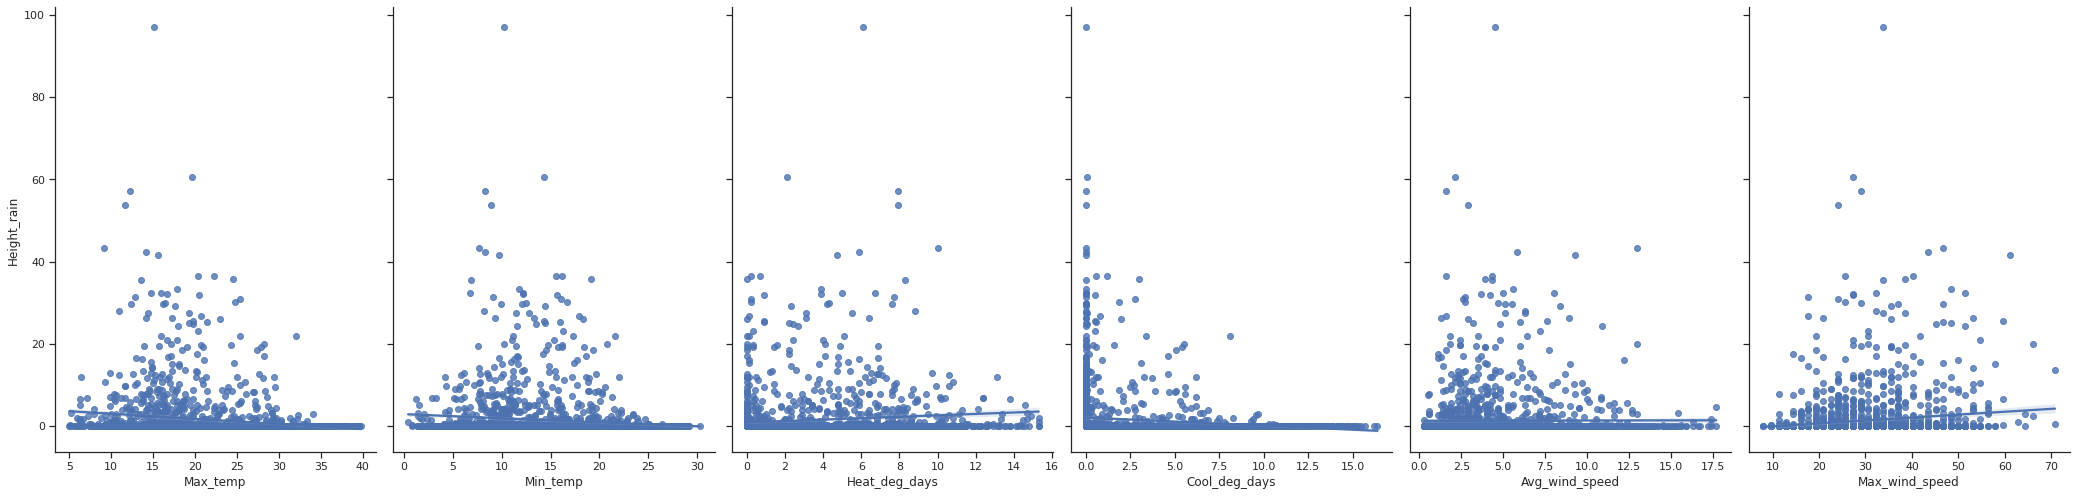

In [ ]:
# Least squares line for height of rain versus each of the features / check for linear relationship between dependent and indepent variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(df16, x_vars=['Max_temp','Min_temp', 'Heat_deg_days', 'Cool_deg_days', 'Avg_wind_speed', 'Max_wind_speed' ],y_vars='Height_rain', size = 7, kind='reg', aspect = 0.7)

In [ ]:
# we now have a pretty good idea of why the model is performing so poorly
# it is clear that our features don't have a strong relantionship with the target / there is no linearity

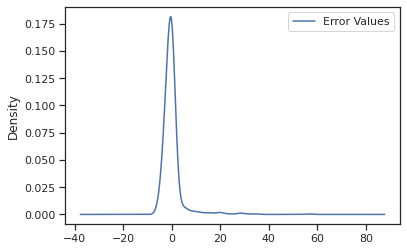

In [ ]:
# residuals
residuals = ytest - ypred
pd.DataFrame({'Error Values': (residuals)}).plot.kde()

In [ ]:
# the distribution of residuals is not normal
# we could try and fix that by applying a log function but the target variable, Height_rain has a vast number of zeros

In [ ]:
# residual mean
resid_mean = np.mean(residuals)
resid_mean

-0.025522156582972987

In [ ]:
# should be 0, another sign that this dataset is not good for regression analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


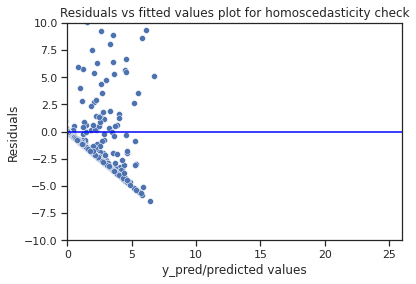

In [ ]:
# final check
p = sns.scatterplot(ypred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# no sign of homoscedasticity, we have a lot of heteroscedasticity
# we now know that this dataset, 2009-2016 is not fit for regression analysis and this is why we get so terrible metrics

# **Problem 1.2/ Meteorological Classification**

1st model: Random Forest

In [ ]:
G = df16.drop(columns='Season')
h = df16['Season']
Gtrain, Gtest, htrain, htest = train_test_split(G, h, test_size = 0.3)

In [ ]:
pipeline.fit(Gtrain, htrain)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score, multilabel_confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
# we will construct a function in order to be able to print the roc_auc score
def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_true)
  y_true = lb.transform(y_true)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_true, y_pred, average=average)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators= 1000, random_state= 0)
rf_clf.fit(Gtrain, htrain)

score = rf_clf.score(Gtest, htest)

hpred = rf_clf.predict(Gtest)

print("Random Forest Classifier roc auc score : {:.2f}".format(multiclass_roc_auc_score(htest, hpred)))
print("\n",classification_report(hpred, htest))

print(multilabel_confusion_matrix(htest, hpred))

print("\n",confusion_matrix(htest, hpred))

Random Forest Classifier roc auc score : 0.78

               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75       201
         1.0       0.55      0.57      0.56       176
         2.0       0.87      0.81      0.84       216
         3.0       0.44      0.54      0.49       140

    accuracy                           0.67       733
   macro avg       0.66      0.66      0.66       733
weighted avg       0.69      0.67      0.68       733

[[[495  58]
  [ 37 143]]

 [[474  76]
  [ 83 100]]

 [[491  41]
  [ 26 175]]

 [[499  65]
  [ 94  75]]]

 [[143  21   0  16]
 [ 43 100   7  33]
 [  0  10 175  16]
 [ 15  45  34  75]]


Random forest for 2009-2016 and 2017 datasets

In [ ]:
K = df17.drop(columns = 'Season')
l = df17['Season']

score_17 = rf_clf.score(K,l)

lpred = rf_clf.predict(K)

print("Random Forest Classifier roc auc score : {:.2f}".format(multiclass_roc_auc_score(l, lpred)))
print("\n",classification_report(lpred, l))

print(multilabel_confusion_matrix(l, lpred))

print("\n",confusion_matrix(l, lpred))

Random Forest Classifier roc auc score : 0.79

               precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       105
         1.0       0.59      0.62      0.60        87
         2.0       0.76      0.83      0.80        84
         3.0       0.54      0.55      0.54        89

    accuracy                           0.68       365
   macro avg       0.68      0.68      0.68       365
weighted avg       0.69      0.68      0.68       365

[[[246  29]
  [ 14  76]]

 [[240  33]
  [ 38  54]]

 [[259  14]
  [ 22  70]]

 [[234  40]
  [ 42  49]]]

 [[76  8  0  6]
 [18 54  3 17]
 [ 0  5 70 17]
 [11 20 11 49]]


Second model: K Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(Gtrain, htrain)

score_knn = knn.score(Gtest, htest)

hpred_knn = rf_clf.predict(Gtest)

print("K Nearest Neighbor Classifier roc auc score : {:.2f}".format(multiclass_roc_auc_score(htest, hpred_knn)))
print("\n",classification_report(hpred_knn, htest))

print(multilabel_confusion_matrix(htest, hpred_knn))

print("\n",confusion_matrix(htest, hpred_knn))

K Nearest Neighbor Classifier roc auc score : 0.78

               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75       201
         1.0       0.55      0.57      0.56       176
         2.0       0.87      0.81      0.84       216
         3.0       0.44      0.54      0.49       140

    accuracy                           0.67       733
   macro avg       0.66      0.66      0.66       733
weighted avg       0.69      0.67      0.68       733

[[[495  58]
  [ 37 143]]

 [[474  76]
  [ 83 100]]

 [[491  41]
  [ 26 175]]

 [[499  65]
  [ 94  75]]]

 [[143  21   0  16]
 [ 43 100   7  33]
 [  0  10 175  16]
 [ 15  45  34  75]]


KNN for 2009-2016 and 2017 datasets

In [ ]:
score_17_knn = knn.score(K,l)

lpred_knn = knn.predict(K)

print("K Nearest Neighbor Classifier roc auc score : {:.2f}".format(multiclass_roc_auc_score(l, lpred_knn)))
print("\n",classification_report(lpred_knn, l))

print(multilabel_confusion_matrix(l, lpred_knn))

print("\n",confusion_matrix(l, lpred_knn))

K Nearest Neighbor Classifier roc auc score : 0.77

               precision    recall  f1-score   support

         0.0       0.82      0.67      0.74       110
         1.0       0.59      0.56      0.57        97
         2.0       0.79      0.80      0.80        91
         3.0       0.40      0.54      0.46        67

    accuracy                           0.65       365
   macro avg       0.65      0.64      0.64       365
weighted avg       0.67      0.65      0.66       365

[[[239  36]
  [ 16  74]]

 [[230  43]
  [ 38  54]]

 [[255  18]
  [ 19  73]]

 [[243  31]
  [ 55  36]]]

 [[74 11  0  5]
 [20 54  5 13]
 [ 0  6 73 13]
 [16 26 13 36]]


In [ ]:
# we see that the metrics of both models are very close and plus that for the second problem the accuracy score is constantly high

Text(0.5, 0, 'Seasons')

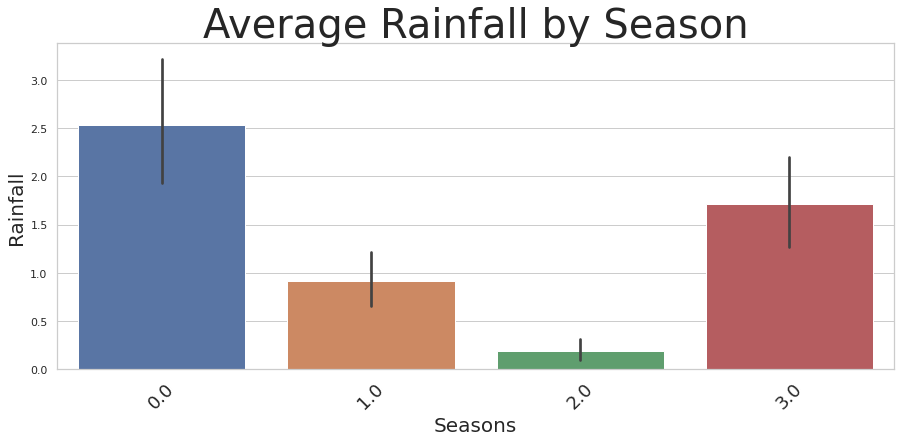

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,6))
plt.title("Average Rainfall by Season", fontsize=40)
sns.barplot(x ="Season", y ="Height_rain", data=df16)
plt.xticks(rotation = 45)
plt.xticks(fontsize=18)
plt.ylabel("Rainfall",fontsize=20)
plt.xlabel("Seasons",fontsize=20)

# **Exercise 2.1/ Assortment Planning**

In [ ]:
# creation of two lists for the columns of the data frames

columns1 = []
for i in range(0,7):
    s = "id"+str(i+1)
    columns1.append(s)
    s = "pb"+str(i+1)
    columns1.append(s)
    s = "pbi"+str(i+1)
    columns1.append(s)
    s = "weight"+str(i+1)
    columns1.append(s)
columns1.append("avgrevenue")

columns2 = []
for i in range(0,10):
    s = "id"+str(i+1)
    columns2.append(s)
    s = "pb"+str(i+1)
    columns2.append(s)
    s = "pbi"+str(i+1)
    columns2.append(s)
    s = "weight"+str(i+1)
    columns2.append(s)
columns2.append("avgrevenue")

In [ ]:
from google.colab import files # 17X7 file upload and dataframe creation
uploaded = files.upload()
df_17x7= pd.read_csv("17x7.txt", header=None, sep = ' ', names = columns1)

Saving 17x7.txt to 17x7 (1).txt


In [ ]:
from google.colab import files # 20X10 file upload and dataframe creation
uploaded = files.upload()
df_20x10= pd.read_csv("20x10.txt", header=None, sep = ' ', names = columns2)

Saving 20x10.txt to 20x10 (1).txt


In [ ]:
df_17x7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         7842 non-null   int64  
 1   pb1         7842 non-null   float64
 2   pbi1        7842 non-null   float64
 3   weight1     7842 non-null   float64
 4   id2         7842 non-null   int64  
 5   pb2         7842 non-null   float64
 6   pbi2        7842 non-null   float64
 7   weight2     7842 non-null   float64
 8   id3         7842 non-null   int64  
 9   pb3         7842 non-null   float64
 10  pbi3        7842 non-null   float64
 11  weight3     7842 non-null   float64
 12  id4         7842 non-null   int64  
 13  pb4         7842 non-null   float64
 14  pbi4        7842 non-null   float64
 15  weight4     7842 non-null   float64
 16  id5         7842 non-null   int64  
 17  pb5         7842 non-null   float64
 18  pbi5        7842 non-null   float64
 19  weight5     7842 non-null  

In [ ]:
df_20x10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         18940 non-null  int64  
 1   pb1         18940 non-null  float64
 2   pbi1        18940 non-null  float64
 3   weight1     18940 non-null  float64
 4   id2         18940 non-null  int64  
 5   pb2         18940 non-null  float64
 6   pbi2        18940 non-null  float64
 7   weight2     18940 non-null  float64
 8   id3         18940 non-null  int64  
 9   pb3         18940 non-null  float64
 10  pbi3        18940 non-null  float64
 11  weight3     18940 non-null  float64
 12  id4         18940 non-null  int64  
 13  pb4         18940 non-null  float64
 14  pbi4        18940 non-null  float64
 15  weight4     18940 non-null  float64
 16  id5         18940 non-null  int64  
 17  pb5         18940 non-null  float64
 18  pbi5        18940 non-null  float64
 19  weight5     18940 non-nul

In [ ]:
# we will transform the dataframes for exercise 2a with two tuples for each and by building a loop
# first for the first dataset

In [ ]:
df_17x7_list  = (7,17) # temp list

df_17x7_prod = []
df_17x7_contr = []

for e in range(0,df_17x7.shape[0]):
    list1 = []
    list2 = []
    for i in range(0,df_17x7_list[0]):
        list2.append(df_17x7.iloc[e,i*4])
    for i in range(0,df_17x7_list[1]):
        if i in list2:
            list1.append(1)
        else:
            list1.append(0)
    df_17x7_contr.append(df_17x7.iloc[e,28]) 
    df_17x7_prod.append(list1)

In [ ]:
print(len(df_17x7_contr))
print(len(df_17x7_prod))

7842
7842


In [ ]:
# transformation of the second dataframe

df_20x10_list = (10,20)

df_20x10_prod = []
df_20x10_contr = []

for e in range(0,df_20x10.shape[0]):
    list3 = []
    list4 = []
    for i in range(0,df_20x10_list[0]):
        list4.append(df_20x10.iloc[e,i*4]) # every for positions exists the product starting from 0
    for i in range(0,df_20x10_list[1]):
        if i in list4:
            list3.append(1)
        else:
            list3.append(0)
    df_20x10_contr.append(df_20x10.iloc[e,40]) # 40 position exists revenue for combination
    df_20x10_prod.append(list3)

In [ ]:
print(len(df_20x10_contr))
print(len(df_20x10_prod))

18940
18940


First model for 17X7 dataset: Linear Regression

In [ ]:
Atrain, Atest, btrain, btest = train_test_split(df_17x7_prod, df_17x7_contr, test_size=0.3)

In [ ]:
pipeline.fit(Atrain, btrain)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(Atrain, btrain)
bpred = lin_reg.predict(Atest)

In [ ]:
# Evaluation report
test_pred_17X7 = lin_reg.predict(Atest)
train_pred_17X7 = lin_reg.predict(Atrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(btest, test_pred_17X7)
print('Train set evaluation:\n_____________________________________')
print_evaluate(btrain, train_pred_17X7)

results_df6 = pd.DataFrame(data=[["Linear Regression", *evaluate(btest, test_pred_17X7), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', "Cross Validation"])
results_df6

Test set evaluation:
_____________________________________
MAE: 16.119402379940503
MSE: 417.7049014047174
RMSE: 20.437830154023626
R2 Score 0.8024436352452335
__________________________________
Train set evaluation:
_____________________________________
MAE: 15.988662962288215
MSE: 407.48568293509203
RMSE: 20.186274617548726
R2 Score 0.8045177691312599
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,16.119402,417.704901,20.43783,0.802444,0.116057


Second model for 17X7 dataset: KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors= 5)
knn_reg.fit(Atrain, btrain)

test_pred_knn = knn_reg.predict(Atest)
train_pred_knn = knn_reg.predict(Atrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(btest, test_pred_knn)

print('Train set evaluation:\n_____________________________________')
print_evaluate(btrain, train_pred_knn)

results_df7 = pd.DataFrame(data=[["K Nearest Neighbors Regressor", *evaluate(btest, test_pred_knn), 0]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Cross Validation'])
results_df7



Test set evaluation:
_____________________________________
MAE: 21.186524946876332
MSE: 699.3153558538501
RMSE: 26.444571387221426
R2 Score 0.6692540617668887
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.484909335033706
MSE: 477.9758814450373
RMSE: 21.862659523604105
R2 Score 0.7707016577041024
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,K Nearest Neighbors Regressor,21.186525,699.315356,26.444571,0.669254,0


In [ ]:
results_df8 = results_df6.append(results_df7, ignore_index=True)
results_df8

,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,15.833488,409.749565,20.242272,0.804359,0.116057
1,K Nearest Neighbors Regressor,21.027751,708.790242,26.623115,0.661578,0.000000


In [ ]:
# we see that for predicting continuous targets and with a good dataset linear regression is a very good choice

The same process for the second dataset

In [ ]:
# linear regression for the second dataset

Mtrain, Mtest, ntrain, ntest = train_test_split(df_20x10_prod, df_20x10_contr, test_size=0.3)
pipeline.fit(Mtrain, ntrain)

linear_reg = LinearRegression()
linear_reg.fit(Mtrain, ntrain)
npred = linear_reg.predict(Mtest)

test_pred_20X10 = linear_reg.predict(Mtest)
train_pred_20X10 = linear_reg.predict(Mtrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ntest, test_pred_20X10)
print('Train set evaluation:\n_____________________________________')
print_evaluate(ntrain, train_pred_20X10)

results_df9 = pd.DataFrame(data=[["Linear Regression", *evaluate(ntest, test_pred_20X10), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', "Cross Validation"])
results_df9

Test set evaluation:
_____________________________________
MAE: 78.3523401971137
MSE: 9809.59235142152
RMSE: 99.04338620736631
R2 Score 0.7109331712235634
__________________________________
Train set evaluation:
_____________________________________
MAE: 79.34644142404585
MSE: 10051.61775647101
RMSE: 100.25775659005646
R2 Score 0.7063606675399946
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,78.35234,9809.592351,99.043386,0.710933,0.116057


In [ ]:
# Knn regression for the second dataset

knn_reg_20X10 = KNeighborsRegressor(n_neighbors= 5)
knn_reg_20X10.fit(Mtrain, ntrain)

test_pred_knn_20X10 = knn_reg_20X10.predict(Mtest)
train_pred_knn_20X10 = knn_reg_20X10.predict(Mtrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ntest, test_pred_knn_20X10)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ntrain, train_pred_knn_20X10)

results_df10 = pd.DataFrame(data=[["K Nearest Neighbors Regressor", *evaluate(ntest, test_pred_knn_20X10), 0]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Cross Validation'])
results_df10

Test set evaluation:
_____________________________________
MAE: 94.83478079901444
MSE: 14240.625952587397
RMSE: 119.33409383988885
R2 Score 0.5803604842652474
__________________________________
Train set evaluation:
_____________________________________
MAE: 79.37672994116758
MSE: 9849.875942581522
RMSE: 99.24654121218292
R2 Score 0.7122541797083859
__________________________________


,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,K Nearest Neighbors Regressor,94.834781,14240.625953,119.334094,0.58036,0


In [ ]:
results_df11 = results_df9.append(results_df10, ignore_index=True)
results_df11

,Model,MAE,MSE,RMSE,R2 Score,Cross Validation
0,Linear Regression,78.352340,9809.592351,99.043386,0.710933,0.116057
1,K Nearest Neighbors Regressor,94.834781,14240.625953,119.334094,0.580360,0.000000


In [ ]:
# again we see that linear regression returns a better r2 score

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ml_methods_algorithms.ipynb')

--2022-02-27 21:44:20--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-02-27 21:44:20 (13.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ml_methods_algorithms.ipynb to pdf
[NbConvertApp] Support files will be in ml_methods_algorithms_files/
[NbConvertApp] Making directory ./ml_methods_algorithms_files
[NbConvertApp] Making directory ./ml_methods_algorithms_files
[NbConvertApp] Making directory ./ml_methods_algori

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'